Markdown is a good format to write almost anything. But we as a data scientist, use Jupyter Notebook, a lot. We could do a very rapid experiment, with plot, data frame, etc. This makes me wonder, is it possible to turn a jupyter notes into a blog post? I actually try to do this at my current company, to create some sort of knowledge management platform for our research team.

The idea is to do some rapid experimentation with jupyter notebook, and when we found something useful, or interesting, we then add some markdown (jupyter notebook support markdown cell), to comment, or perhaps explain our code. Then using jupyter notebook converter (`jupyter-nbconvert`), and viola, we get a markdown that could be used in our hugo sites.

The problem with this approach is that some charts that are being generated can't be uploaded to your site automatically. If you have your own server, you probably could write a script that move your generated chart into public folder (`/var/www/html`) and replace the url in the markdown to point that public image. This approach what I used in my previous company.

But in case you are using Github pages, or perhaps you just don't want to clutter your private server with the generated images, this approach might not be preferable. For this, we could use object storage (S3). This is the approach I used for this blog.

## Step

The overall process is simple: 
1. Use `jupyter-nbconvert` to convert your notebook files into markdown 
2. For each generated chart and local image, upload them to the S3 server
3. Replace the image URL from (1) step with the public link from (2)

S3 is great for storing media and other assets for your site. There are many providers to choose from, start with AWS, GCP, even Linode. But currently I'm using a local Indonesia S3 provider, [idcloudhost](https://idcloudhost.com/) since it doesn't have a minimum monthly payment and you pay as you used. So you don't have to pay $5 per month for 250 GB where you only have 100MB files on it. It might be a little bit slow compares to other well-known provider, but it's enough for my needs (for now).

## pynote2mds3

To make everything easier, I've created a small script to automate this process that I called [pynote2mds3](https://github.com/adibPr/pynote2mds3). With this tool, you just need to provide your basic S3 access information in a configuration file and you are ready to go.
Just run `pynote2mds3 mynotes.ipynb` and it will convert and upload the generated image for you. The end result is a markdown file that is ready to be used in Hugo.

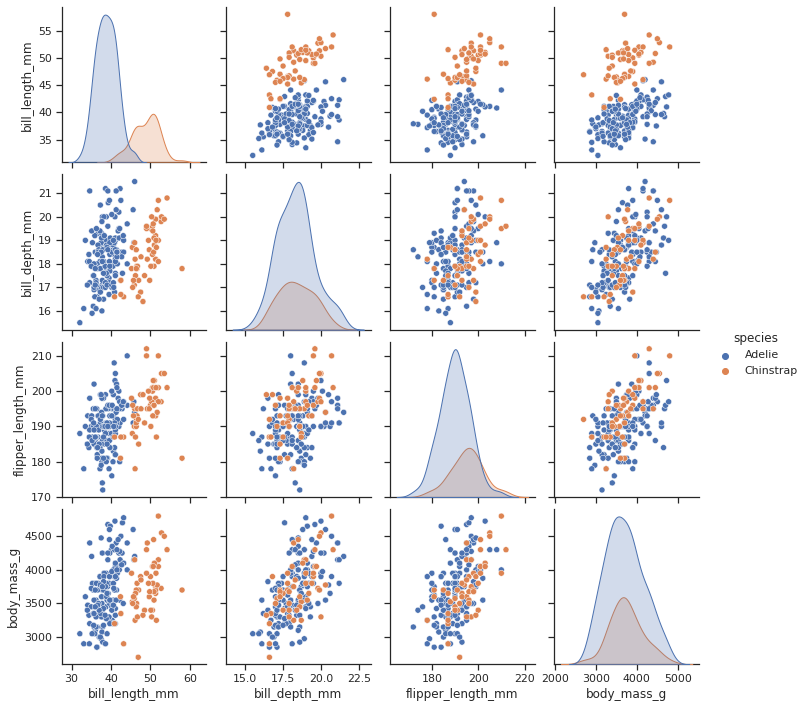

In [6]:
import seaborn as sns
sns.set_theme(style="ticks")

df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

How about that?